In [3]:
import doubleton_sharing
import dask

import malariagen_data
import pandas as pd

#import tensorflow

# quieten dask warnings about large chunks
dask.config.set(**{'array.slicing.split_large_chunks': True})

In [2]:
# gain access to the gateway
from dask_gateway import Gateway
gateway = Gateway()

for c in gateway.list_clusters():
    gateway.stop_cluster(c.name)
    
gateway.list_clusters()

# create a cluster with the options selected via the widgets above
# ... may take a few minutes to provision a VM for the scheduler
cluster = gateway.new_cluster(environment="binder-v3.3.0", profile="Very High Memory Worker")

# you can scale the cluster using the widget above, or via a manual API call
# ... may take a few minutes to provision VMs for the workers
cluster.scale(200)

# get a client - this tells Dask to use the cluster you've just created
client = cluster.get_client()

In [3]:
cluster

In [4]:
colu_cohorts = ['CI-LG_colu_2012', 'GH-CP_colu_2012',
                'BF-09_colu_2012', 'BF-09_colu_2014', 'ML-3_colu_2012', 'ML-2_colu_2014', 'ML-4_colu_2004',
                'AO-LUA_colu_2009']
gamb_cohorts = ['GN-N_gamb_2012', 'GN-F_gamb_2012', 'BF-09_gamb_2012', 'BF-09_gamb_2014', 'ML-2_gamb_2014',
               'ML-2_gamb_2004', 'CM-ES_gamb_2009', 'GA-1_gamb_2000', 'UG-E_gamb_2012', 'MZ-I_gamb_2004' #, 'UG-W_gamb_2012',
               #'TZ-05_gamb_2015', 'TZ-25_gamb_2013'
               ]
all_cohorts = gamb_cohorts + colu_cohorts

In [4]:
ag3 = malariagen_data.Ag3("gs://vo_agam_release/", pre=True)

In [6]:
df_balloon_all = ag3.sample_metadata(sample_sets="1177-VO-ML-LEHMANN-VMF00015")
gamb_idx = df_balloon_all[df_balloon_all.species_gambiae_coluzzii == 'gambiae'].index[0]

In [7]:
df_balloon_all

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species
0,VBS04793-4651STDY7017929,MB257 (MB2),Tovi Lehmann,Mali,Markabougou,2013,8,13.914,-6.344,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.979,0.002,gamb_colu,coluzzii,coluzzii
1,VBS04794-4651STDY7017930,TB615,Tovi Lehmann,Mali,Thierola,2014,9,13.659,-7.215,M,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.971,0.003,gamb_colu,coluzzii,coluzzii
2,VBS04796-4651STDY7017932,TB513 (SB513),Tovi Lehmann,Mali,Siguima,2014,8,14.168,-7.228,M,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.982,0.003,gamb_colu,coluzzii,coluzzii
3,VBS04797-4651STDY7017933,SB173 (SB3),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.982,0.002,gamb_colu,coluzzii,coluzzii
4,VBS04798-4651STDY7017934,SB173 (SB4),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.971,0.002,gamb_colu,coluzzii,coluzzii
5,VBS04799-4651STDY7017935,SB407,Tovi Lehmann,Mali,Siguima,2014,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.986,0.002,gamb_colu,coluzzii,coluzzii
6,VBS04801-4651STDY7017937,SB179 (SB7),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.971,0.002,gamb_colu,coluzzii,coluzzii
7,VBS04802-4651STDY7017938,SB178 (SB5),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.986,0.002,gamb_colu,coluzzii,coluzzii
8,VBS04803-4651STDY7017939,DB40,Tovi Lehmann,Mali,Dallowere,2015,7,13.616,-7.037,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.980,0.002,gamb_colu,coluzzii,coluzzii
9,VBS04804-4651STDY7017940,TB861,Tovi Lehmann,Mali,Thierola,2015,7,13.659,-7.215,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.966,0.002,gamb_colu,coluzzii,coluzzii


In [8]:
(
    ag3.sample_metadata(sample_sets='v3.1').query("country == 'Mali'")
        .pivot_table(
            index=['location', 'year', 'month'],
            columns='species',
            values='sample_id',
            aggfunc=len,
            fill_value=0,
        )
)

species                       arabiensis  coluzzii  gambiae  \
location          year month                                  
Dallowere         2012 6               0        10        0   
                       9               0         8        5   
                       10              1         8        0   
                       11              0         2        0   
                  2014 5               0        16        0   
                       6               0        48        0   
                       9               1        13        2   
                       10             15        50       14   
                  2015 4               0        48        0   
                       6               1        49        0   
                       9               2        49        6   
                       10              9        33       17   
Sokourani (Niono) 2012 3               0         4        0   
                       4               0         2        0   
                       9               0         3        0   
                       10              0         7        0   
                       11              0         8        0   
                  2013 3               0        12        0   
                       4               0        16        0   
                       10              0        45        0   
                  2014 4               0        39        0   
                  2015 4               0        52        0   
                       10              0        52        0   

species                       intermediate_arabiensis_gambiae  
location          year month                                   
Dallowere         2012 6                                    0  
                       9                                    0  
                       10                                   0  
                       11                                   0  
                  2014 5                                    0  
                       6                                    0  
                       9                                    0  
                       10                                   0  
                  2015 4                                    0  
                       6                                    0  
                       9                                    1  
                       10                                   0  
Sokourani (Niono) 2012 3                                    0  
                       4                                    0  
                       9                                    0  
                       10                                   0  
                       11                                   0  
                  2013 3                                    0  
                       4                                    0  
                       10                                   0  
                  2014 4                                    0  
                  2015 4                                    0  
                       10                                   0

In [9]:
queries = [('Dall12Xcol', 
                "location == 'Dallowere' and year == 2012 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall146col', 
                "location == 'Dallowere' and year == 2014 and month == 6 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall1410col', 
                "location == 'Dallowere' and year == 2014 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall154col', 
                "location == 'Dallowere' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall156col', 
                "location == 'Dallowere' and year == 2015 and month == 6 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall159col', 
                "location == 'Dallowere' and year == 2015 and month == 9 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall1510col', 
                "location == 'Dallowere' and year == 2015 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko12Xcol', 
                "location == 'Sokourani (Niono)' and year == 2012 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko1310col', 
                "location == 'Sokourani (Niono)' and year == 2013 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko144col', 
                "location == 'Sokourani (Niono)' and year == 2014 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko154col', 
                "location == 'Sokourani (Niono)' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko1510col', 
                "location == 'Sokourani (Niono)' and year == 2015 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),]
queries_p_gamb = queries + [('3.1_gamb', "species_gambiae_coluzzii == 'gambiae'")]

In [10]:
df_samples = ag3.sample_metadata(sample_sets=["v3_wild", "v3.1", "v3.2", "v3.3", "v3.4", "v3.5"])
df_cohorts = ag3.sample_cohorts(sample_sets = ["v3_wild", "v3.1", "v3.2", "v3.3", "v3.4", "v3.5"])

In [11]:
df_samples.set_index('sample_id', inplace=True)
df_cohorts.set_index('sample_id', inplace=True)

In [12]:
df_meta = df_samples.join(df_cohorts)

In [13]:
df_meta.reset_index(inplace=True)

In [14]:
df_cmr = ag3.sample_metadata(sample_sets='v3')
list(df_cmr.query("country == 'Cameroon' and species_gambiae_coluzzii == 'coluzzii'").index)

[943,
 956,
 957,
 958,
 959,
 960,
 961,
 1006,
 1007,
 1010,
 1014,
 1015,
 1019,
 1020,
 1021,
 1024,
 1027,
 1029,
 1031,
 1034,
 1037,
 1039,
 1040,
 1041,
 1042,
 1049]

In [15]:
(
    df_meta.query("country_ISO == 'CMR'")
        .pivot_table(
            index=['sample_set','cohort_admin1_year', 'cohort_admin2_year'],
            columns='taxon',
            values='sample_id',
            aggfunc=len,
            fill_value=0,
        )
)

taxon                                                            arabiensis  \
sample_set   cohort_admin1_year cohort_admin2_year                            
AG1000G-CM-A CM-ES_gamb_2009    CM-ES_Haut-Nyong_gamb_2009                0   
                                CM-ES_Lom-Et-Djérem_gamb_2009             0   
AG1000G-CM-B CM-AD_gamb_2005    CM-AD_Djérem_gamb_2005                    0   
                                CM-AD_Vina_gamb_2005                      0   
             CM-CE_gamb_2005    CM-CE_Lekié_gamb_2005                     0   
                                CM-CE_Mfoundi_gamb_2005                   0   
                                CM-CE_Nyong-Et-So'O_gamb_2005             0   
             CM-EN_colu_2005    CM-EN_Diamaré_colu_2005                   0   
             CM-EN_gamb_2005    CM-EN_Diamaré_gamb_2005                   0   
                                CM-EN_Mayo-Kani_gamb_2005                 0   
             CM-NO_colu_2005    CM-NO_Bénoué_colu_2005                    0   
                                CM-NO_Mayo-Rey_colu_2005                  0   
             CM-NO_gamb_2005    CM-NO_Bénoué_gamb_2005                    0   
                                CM-NO_Mayo-Louti_gamb_2005                0   
                                CM-NO_Mayo-Rey_gamb_2005                  0   
             CM-OU_gamb_2005    CM-OU_Mifi_gamb_2005                      0   
                                CM-OU_Noun_gamb_2005                      0   
             CM-SU_gamb_2005    CM-SU_Mvila_gamb_2005                     0   
                                CM-SU_Océan_gamb_2005                     0   
AG1000G-CM-C CM-AD_colu_2013    CM-AD_Djérem_colu_2013                    0   
             CM-AD_gamb_2013    CM-AD_Djérem_gamb_2013                    0   
             CM-CE_colu_2013    CM-CE_Mfoundi_colu_2013                   0   
                                CM-CE_Méfou-Et-Afamba_colu_2013           0   
             CM-CE_gamb_2013    CM-CE_Méfou-Et-Afamba_gamb_2013           0   
             CM-LT_colu_2013    CM-LT_Wouri_colu_2013                     0   
             CM-NO_arab_2013    CM-NO_Bénoué_arab_2013                    2   
             CM-NO_colu_2013    CM-NO_Bénoué_colu_2013                    0   
             CM-OU_gamb_2013    CM-OU_Noun_gamb_2013                      0   
             CM-SU_colu_2013    CM-SU_Océan_colu_2013                     0   
             CM-SU_gamb_2013    CM-SU_Océan_gamb_2013                     0   

taxon                                                            coluzzii  \
sample_set   cohort_admin1_year cohort_admin2_year                          
AG1000G-CM-A CM-ES_gamb_2009    CM-ES_Haut-Nyong_gamb_2009              0   
                                CM-ES_Lom-Et-Djérem_gamb_2009           0   
AG1000G-CM-B CM-AD_gamb_2005    CM-AD_Djérem_gamb_2005                  0   
                                CM-AD_Vina_gamb_2005                    0   
             CM-CE_gamb_2005    CM-CE_Lekié_gamb_2005                   0   
                                CM-CE_Mfoundi_gamb_2005                 0   
                                CM-CE_Nyong-Et-So'O_gamb_2005           0   
             CM-EN_colu_2005    CM-EN_Diamaré_colu_2005                 2   
             CM-EN_gamb_2005    CM-EN_Diamaré_gamb_2005                 0   
                                CM-EN_Mayo-Kani_gamb_2005               0   
             CM-NO_colu_2005    CM-NO_Bénoué_colu_2005                  4   
                                CM-NO_Mayo-Rey_colu_2005                1   
             CM-NO_gamb_2005    CM-NO_Bénoué_gamb_2005                  0   
                                CM-NO_Mayo-Louti_gamb_2005              0   
                                CM-NO_Mayo-Rey_gamb_2005                0   
             CM-OU_gamb_2005    CM-OU_Mifi_gamb_2005                    0   
                                CM-OU_Noun_gamb_2005                    0   
        

In [16]:
(
    df_meta.query("country_ISO == 'BFA'")
        .pivot_table(
            index=['sample_set','cohort_admin1_year', 'cohort_admin2_year'],
            columns='taxon',
            values='sample_id',
            aggfunc=len,
            fill_value=0,
        )
)

taxon                                                                       arabiensis  \
sample_set                       cohort_admin1_year cohort_admin2_year                   
1191-VO-MULTI-OLOUGHLIN-VMF00106 BF-09_colu_2014    BF-09_Houet_colu_2014            0   
                                 BF-09_gamb_2014    BF-09_Houet_gamb_2014            0   
1191-VO-MULTI-OLOUGHLIN-VMF00140 BF-09_arab_2014    BF-09_Houet_arab_2014            9   
                                 BF-09_arab_2015    BF-09_Houet_arab_2015           88   
                                 BF-09_arab_2016    BF-09_Houet_arab_2016           14   
                                 BF-09_arab_2017    BF-09_Houet_arab_2017            1   
                                 BF-09_colu_2014    BF-09_Houet_colu_2014            0   
                                 BF-09_colu_2015    BF-09_Houet_colu_2015            0   
                                 BF-09_colu_2016    BF-09_Houet_colu_2016            0   
                                 BF-09_colu_2017    BF-09_Houet_colu_2017            0   
                                 BF-09_gamb_2014    BF-09_Houet_gamb_2014            0   
                                 BF-09_gamb_2015    BF-09_Houet_gamb_2015            0   
                                 BF-09_gamb_2016    BF-09_Houet_gamb_2016            0   
                                 BF-09_gamb_2017    BF-09_Houet_gamb_2017            0   
AG1000G-BF-A                     BF-09_colu_2012    BF-09_Houet_colu_2012            0   
                                 BF-09_gamb_2012    BF-09_Houet_gamb_2012            0   
AG1000G-BF-B                     BF-09_arab_2014    BF-09_Houet_arab_2014            3   
                                 BF-09_colu_2014    BF-09_Houet_colu_2014            0   
                                 BF-09_gamb_2014    BF-09_Houet_gamb_2014            0   
AG1000G-BF-C                     BF-07_gamb_2004    BF-07_Bazega_gamb_2004           0   

taxon                                                                       coluzzii  \
sample_set                       cohort_admin1_year cohort_admin2_year                 
1191-VO-MULTI-OLOUGHLIN-VMF00106 BF-09_colu_2014    BF-09_Houet_colu_2014          3   
                                 BF-09_gamb_2014    BF-09_Houet_gamb_2014          0   
1191-VO-MULTI-OLOUGHLIN-VMF00140 BF-09_arab_2014    BF-09_Houet_arab_2014          0   
                                 BF-09_arab_2015    BF-09_Houet_arab_2015          0   
                                 BF-09_arab_2016    BF-09_Houet_arab_2016          0   
                                 BF-09_arab_2017    BF-09_Houet_arab_2017          0   
                                 BF-09_colu_2014    BF-09_Houet_colu_2014         90   
                                 BF-09_colu_2015    BF-09_Houet_colu_2015        183   
                                 BF-09_colu_2016    BF-09_Houet_colu_2016        168   
                                 BF-09_colu_2017    BF-09_Houet_colu_2017        164   
                                 BF-09_gamb_2014    BF-09_Houet_gamb_2014          0   
                                 BF-09_gamb_2015    BF-09_Houet_gamb_2015          0   
                                 BF-09_gamb_2016    BF-09_Houet_gamb_2016          0   
                                 BF-09_gamb_2017    BF-09_Houet_gamb_2017          0   
AG1000G-BF-A                     BF-09_colu_2012    BF-09_Houet_colu_2012         82   
                                 BF-09_gamb_2012    BF-09_Houet_gamb_2012          0   
AG1000G-BF-B                     BF-09_arab_2014    BF-09_Houet_arab_2014          0   
                                 BF-09_colu_2014    BF-09_Houet_colu_2014         53   
                                 BF-09_gamb_2014    BF-09_Houet_gamb_2014          0   
AG1000G-BF-C                     BF-07_gamb_2004    BF-07_Bazega_gamb_2004         0   

taxon                                                                       gambia

In [17]:
df_balloon = ag3.sample_metadata(sample_sets="1177-VO-ML-LEHMANN-VMF00015")
df_balloon[df_balloon.species_gambcolu_arabiensis == 'gamb_colu'].drop([2])

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species
0,VBS04793-4651STDY7017929,MB257 (MB2),Tovi Lehmann,Mali,Markabougou,2013,8,13.914,-6.344,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.979,0.002,gamb_colu,coluzzii,coluzzii
1,VBS04794-4651STDY7017930,TB615,Tovi Lehmann,Mali,Thierola,2014,9,13.659,-7.215,M,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.971,0.003,gamb_colu,coluzzii,coluzzii
3,VBS04797-4651STDY7017933,SB173 (SB3),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.982,0.002,gamb_colu,coluzzii,coluzzii
4,VBS04798-4651STDY7017934,SB173 (SB4),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.971,0.002,gamb_colu,coluzzii,coluzzii
5,VBS04799-4651STDY7017935,SB407,Tovi Lehmann,Mali,Siguima,2014,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.986,0.002,gamb_colu,coluzzii,coluzzii
6,VBS04801-4651STDY7017937,SB179 (SB7),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.971,0.002,gamb_colu,coluzzii,coluzzii
7,VBS04802-4651STDY7017938,SB178 (SB5),Tovi Lehmann,Mali,Siguima,2013,8,14.168,-7.228,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.986,0.002,gamb_colu,coluzzii,coluzzii
8,VBS04803-4651STDY7017939,DB40,Tovi Lehmann,Mali,Dallowere,2015,7,13.616,-7.037,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.980,0.002,gamb_colu,coluzzii,coluzzii
9,VBS04804-4651STDY7017940,TB861,Tovi Lehmann,Mali,Thierola,2015,7,13.659,-7.215,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.966,0.002,gamb_colu,coluzzii,coluzzii
10,VBS04805-4651STDY7017941,TB980,Tovi Lehmann,Mali,Thierola,2015,9,13.659,-7.215,F,1177-VO-ML-LEHMANN-VMF00015,v3.2,0.990,0.002,gamb_colu,coluzzii,coluzzii


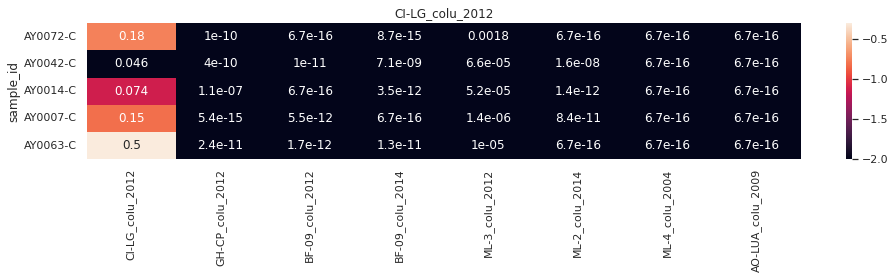

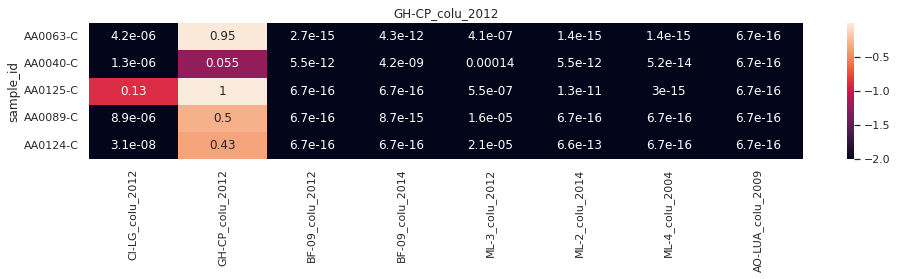

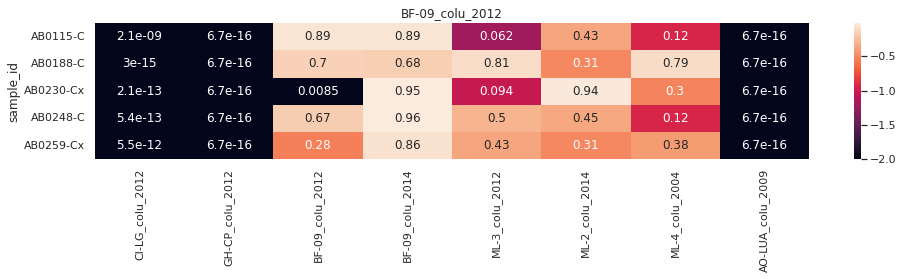

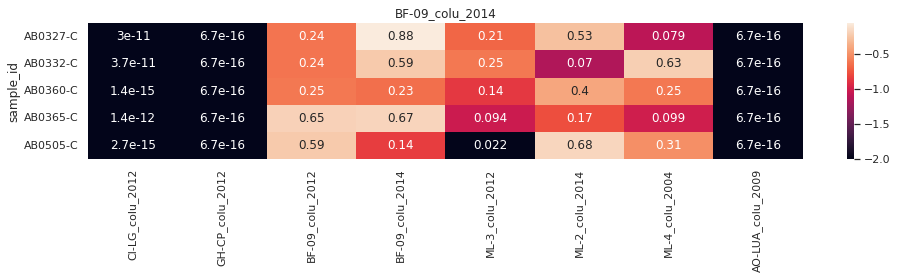

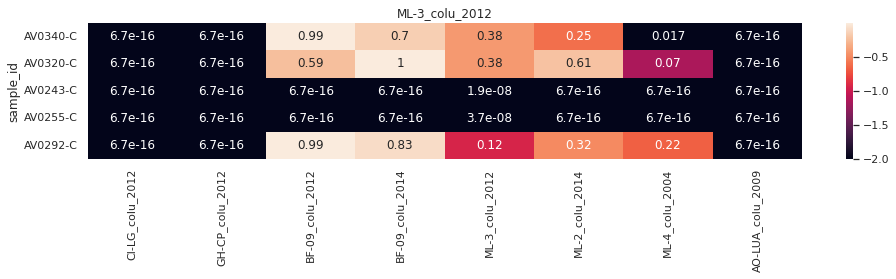

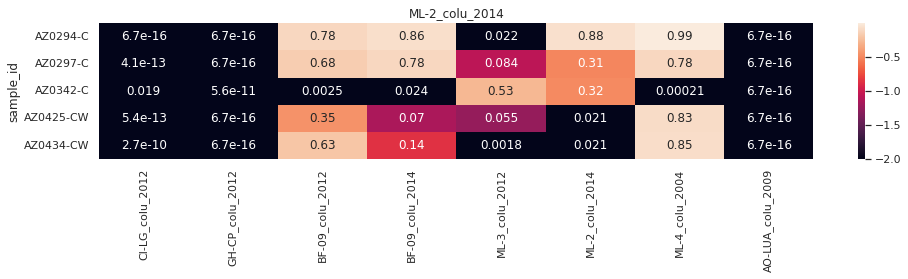

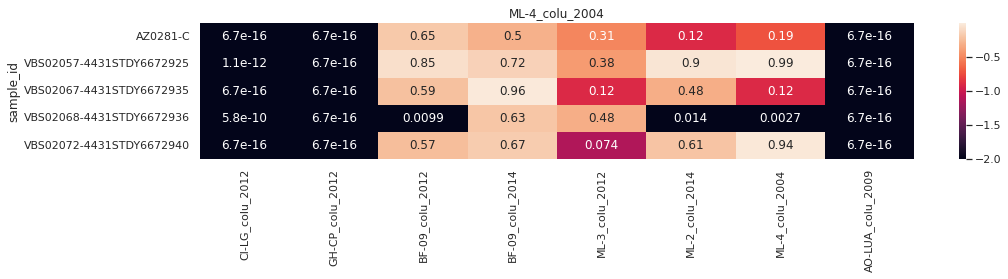

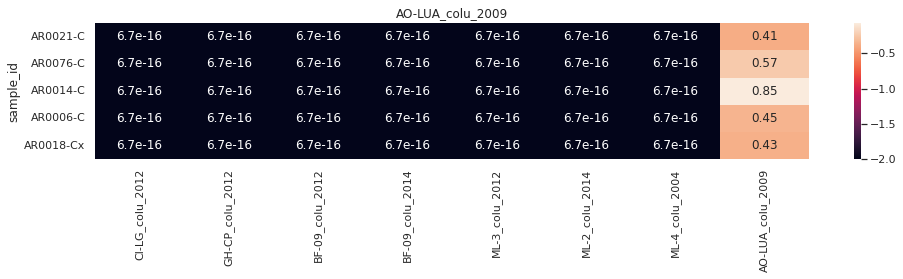

In [18]:
doubleton_sharing.plot_heatmap_compare(colu_cohorts, 20, 5, 'gamb_colu')

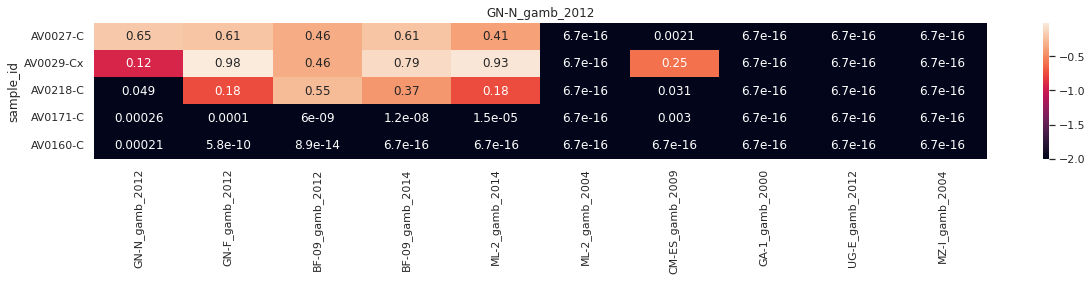

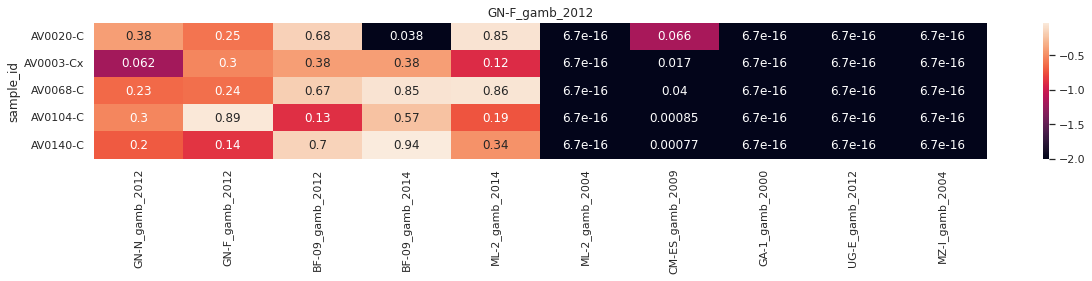

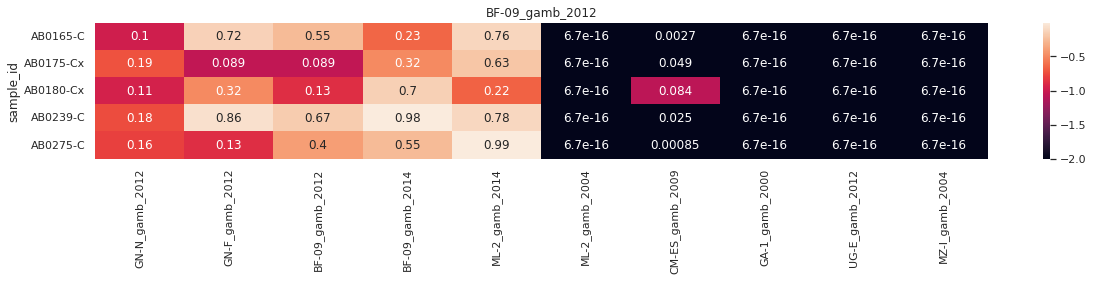

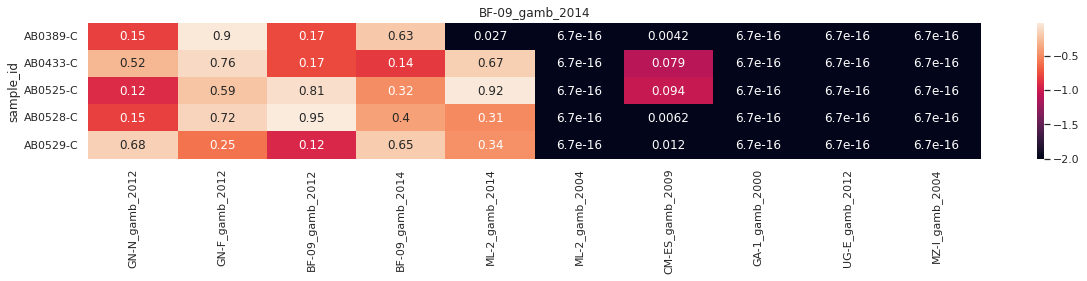

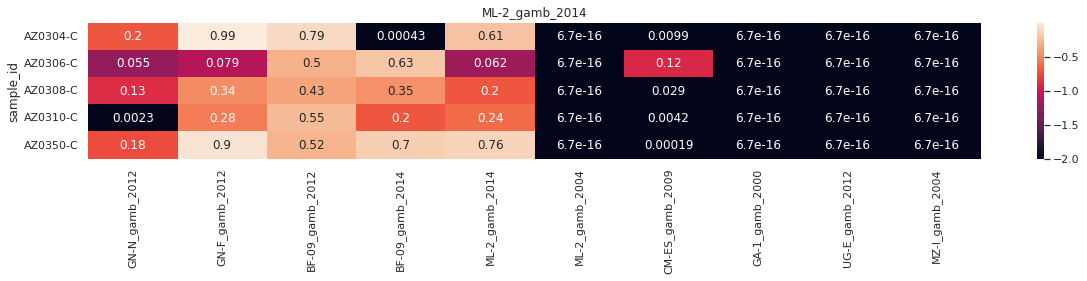

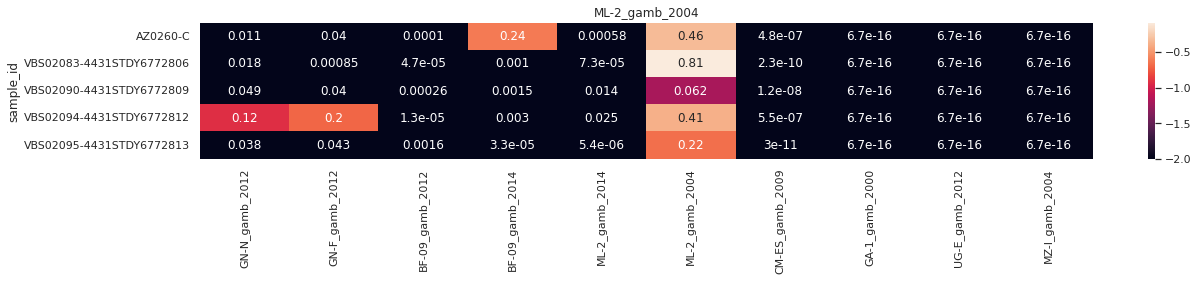

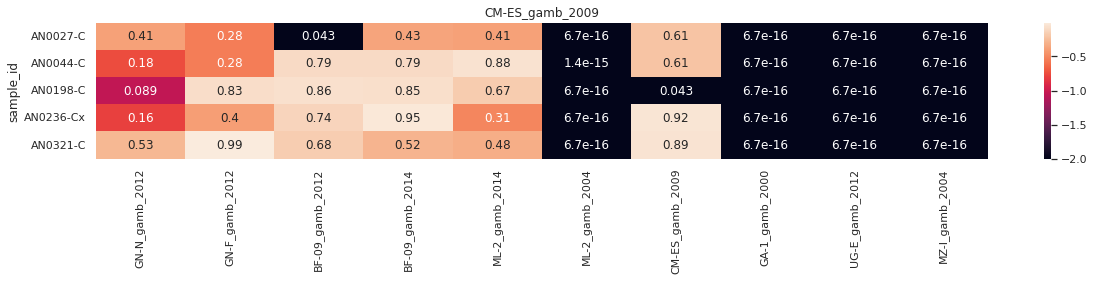

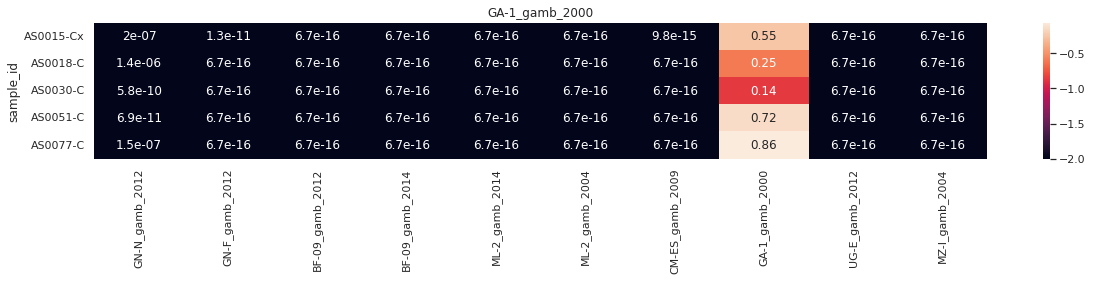

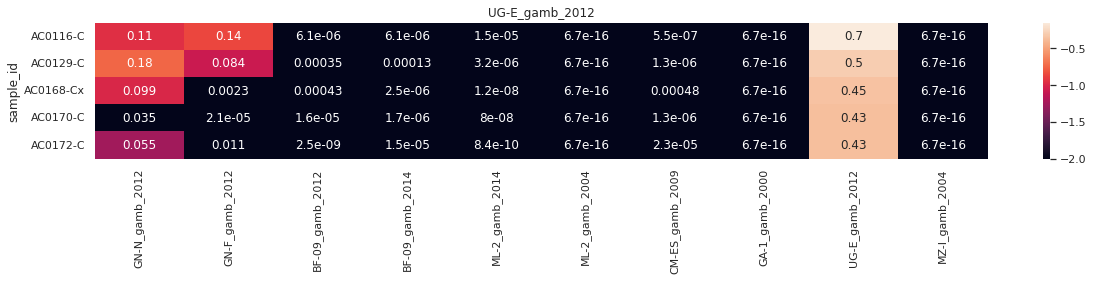

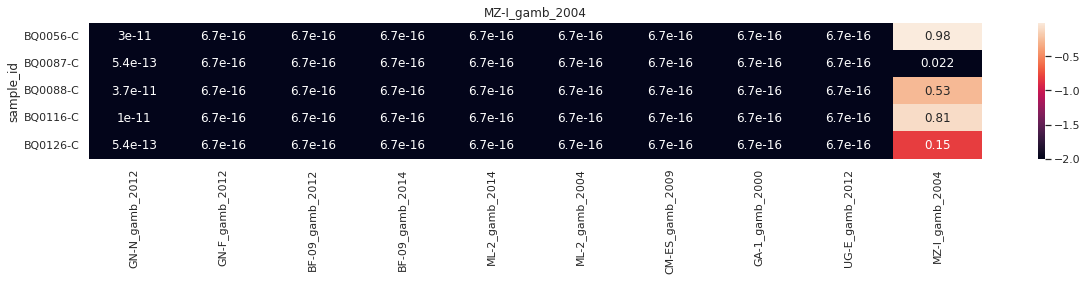

In [19]:
doubleton_sharing.plot_heatmap_compare(gamb_cohorts, 20, 5, 'gamb_colu')

In [ ]:
doubleton_sharing.plot_heatmap_compare(all_cohorts, 20, 5, 'gamb_colu')

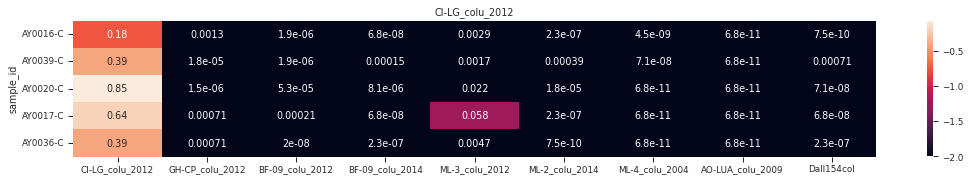

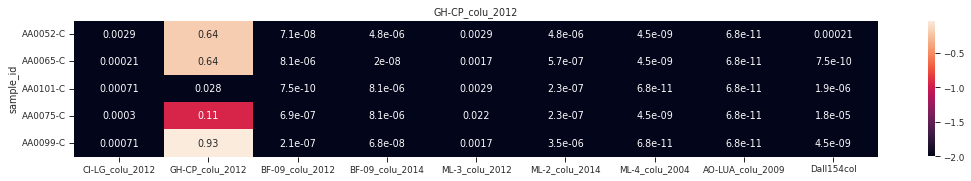

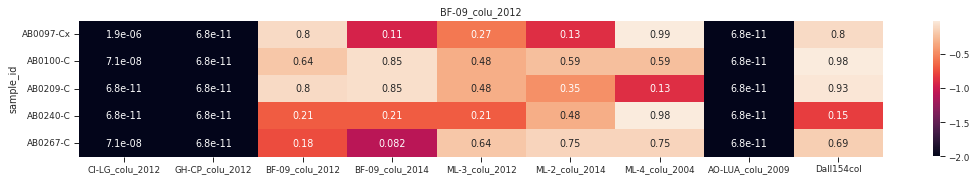

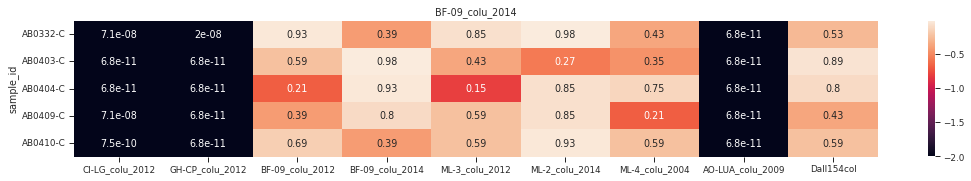

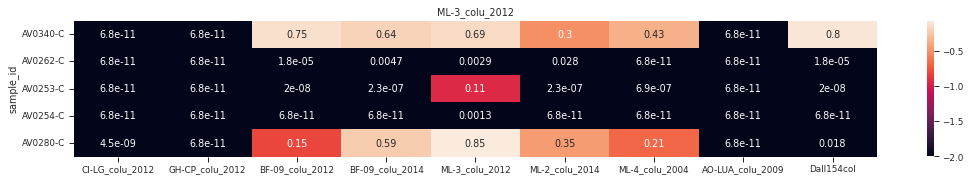

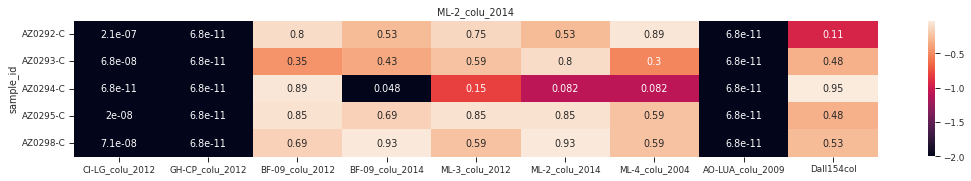

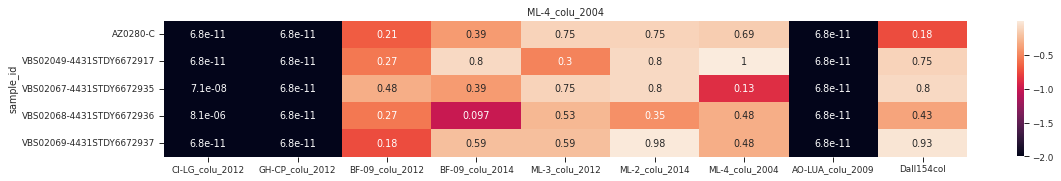

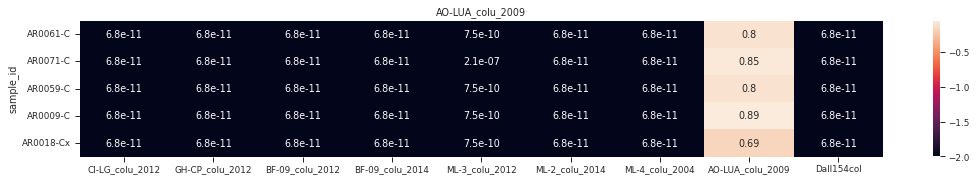

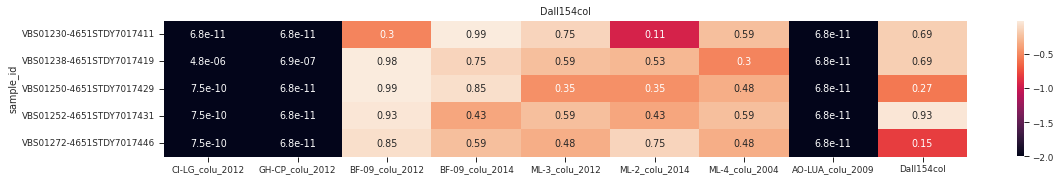

In [6]:
doubleton_sharing.plot_heatmap_compare(colu_cohorts, 10, 5, 'gamb_colu', queries3_1 = [('Dall154col', "location == 'Dallowere' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'")])

In [18]:
queries = [('Dall154col', 
                "location == 'Dallowere' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko154col', 
                "location == 'Sokourani (Niono)' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'")]
queries_p_gamb = queries + [('3.1_gamb', "species_gambiae_coluzzii == 'gambiae'")]

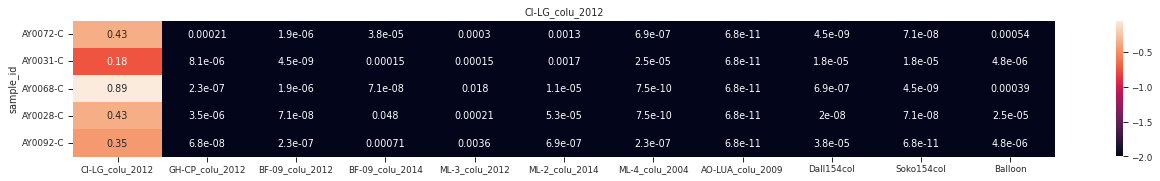

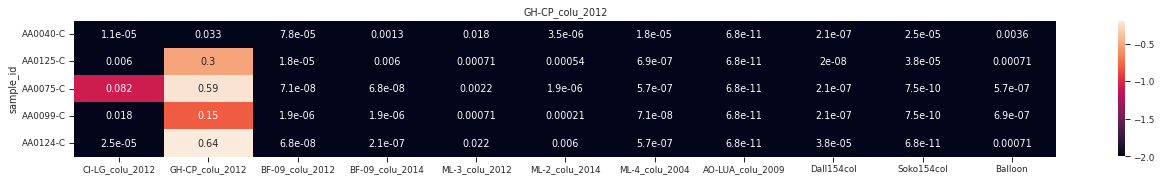

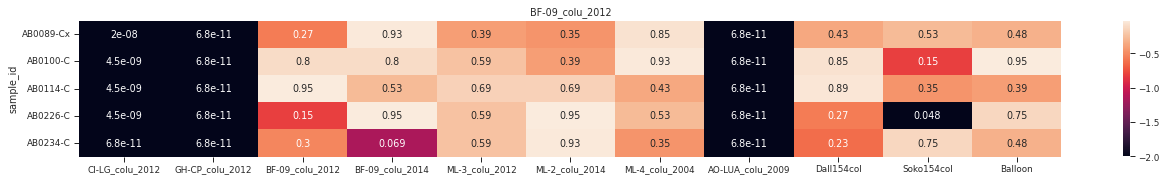

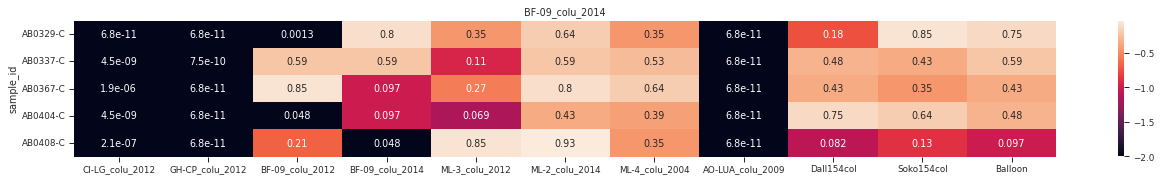

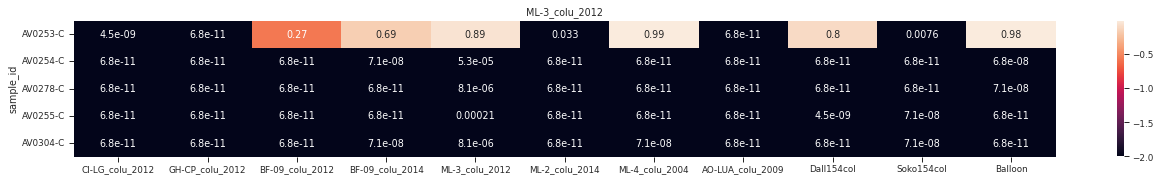

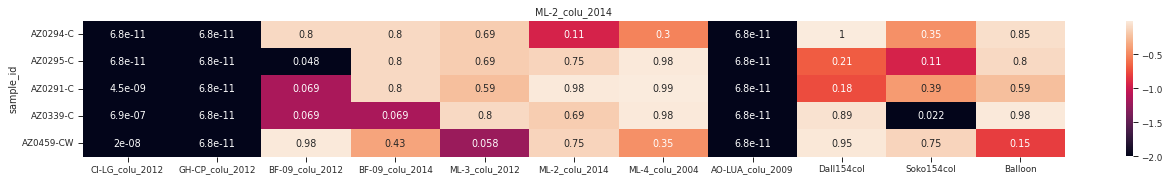

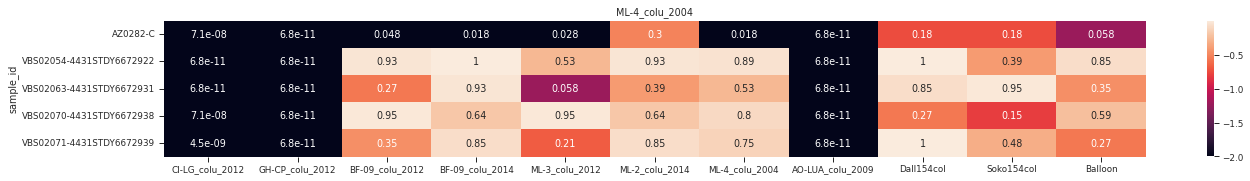

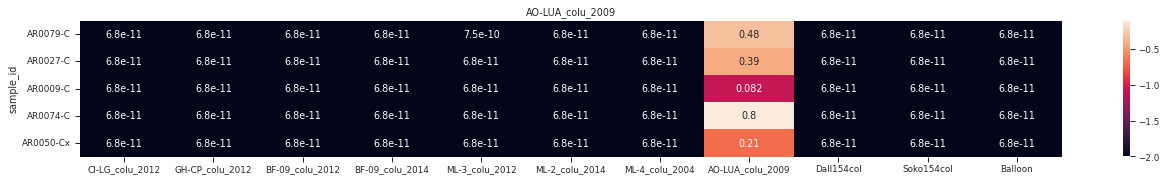

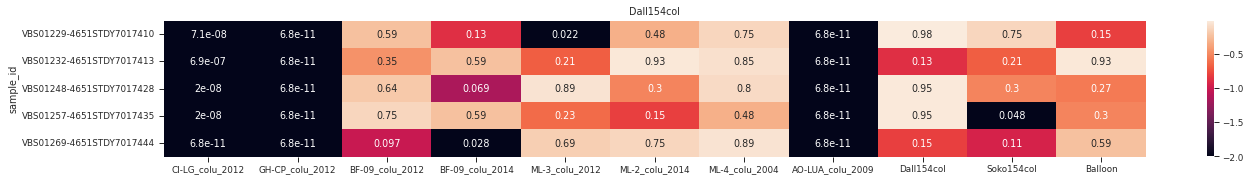

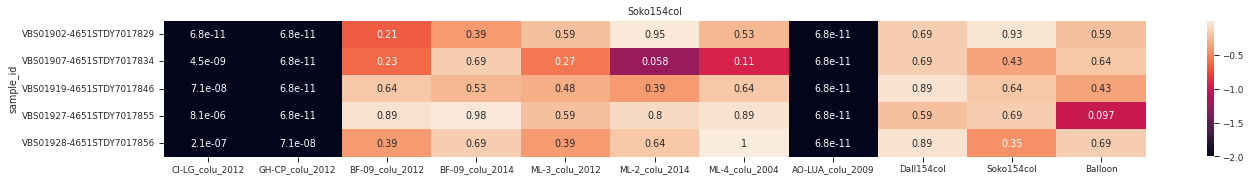

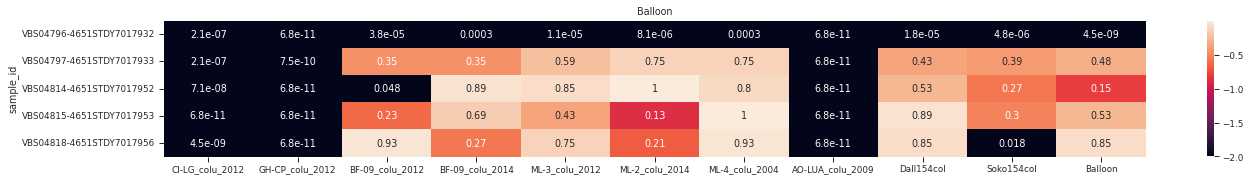

In [7]:
doubleton_sharing.plot_heatmap_compare(colu_cohorts, 10, 5, 'gamb_colu', queries3_1 = queries, incball = 'normal')

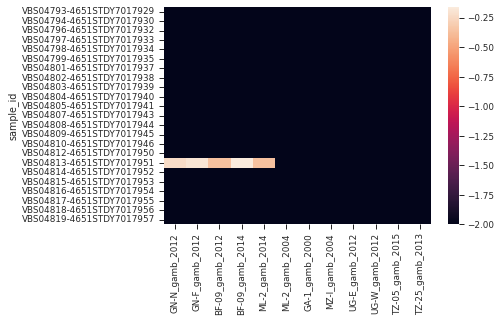

In [7]:
doubleton_sharing.plot_heatmap_identify(gamb_cohorts, 10, 'gamb_colu', queries3_1 = False)

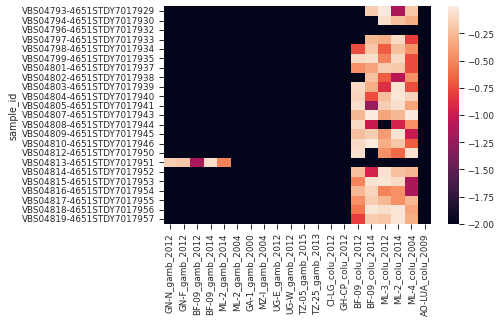

In [8]:
doubleton_sharing.plot_heatmap_identify(all_cohorts, 10, 'gamb_colu', queries3_1 = False)

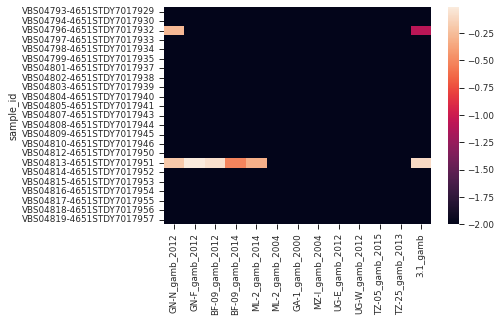

In [15]:
doubleton_sharing.plot_heatmap_identify(gamb_cohorts, 10, 'gamb_colu', queries3_1 = [('3.1_gamb', "species_gambiae_coluzzii == 'gambiae'")])

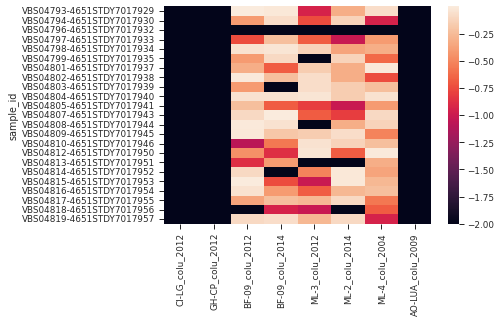

In [11]:
doubleton_sharing.plot_heatmap_identify(colu_cohorts, 10, 'gamb_colu', queries3_1 = False)

distributed.client - WARNING - Couldn't gather 1 keys, rescheduling {"('sum-aggregate-dfd70ea918bc4a7ac8a2d2881bb0f669', 24, 0)": ('tls://10.88.31.3:41011',)}


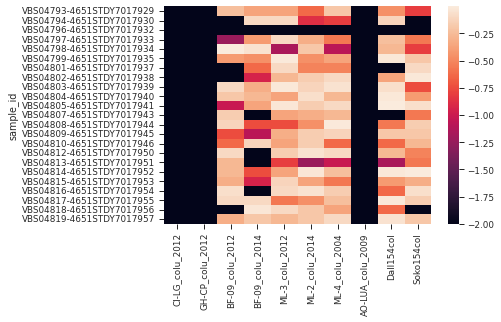

In [12]:
doubleton_sharing.plot_heatmap_identify(colu_cohorts, 10, 'gamb_colu', queries3_1 = queries)

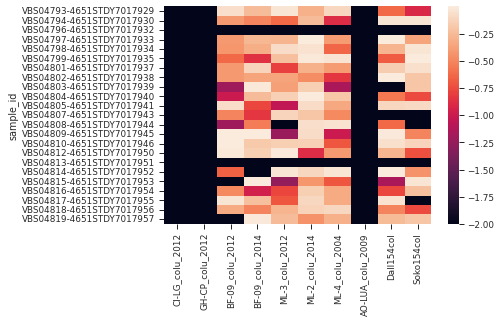

In [20]:
doubleton_sharing.plot_heatmap_identify(colu_cohorts, 20, 'gamb_colu', queries3_1 = queries)

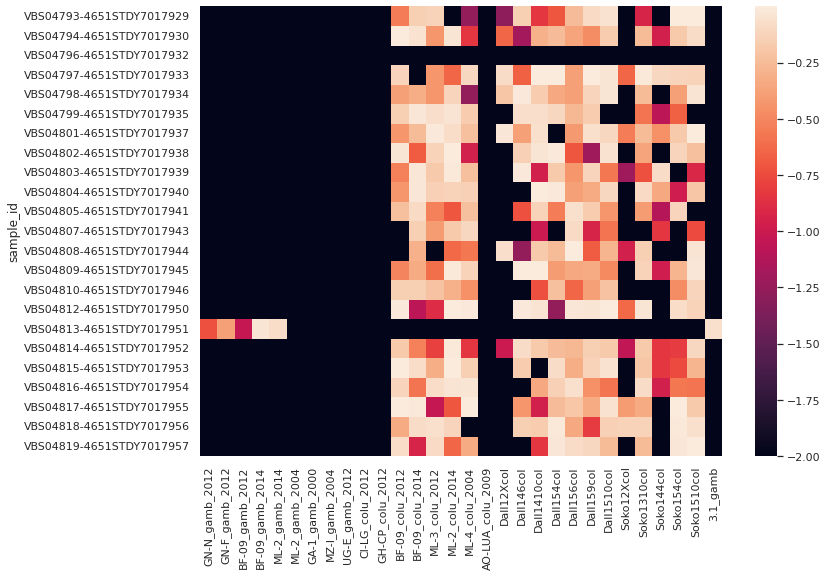

In [18]:
doubleton_sharing.plot_heatmap_identify(all_cohorts, 20, 'gamb_colu', queries3_1 = queries_p_gamb)

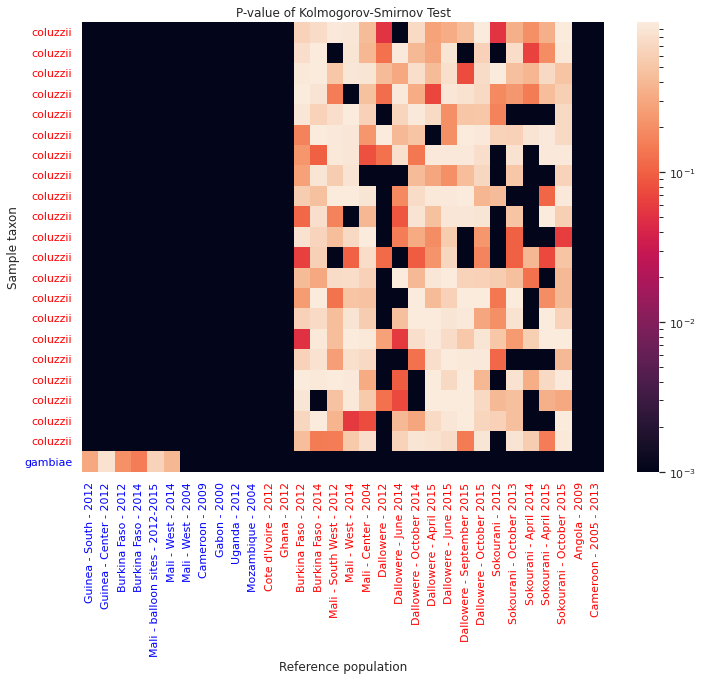

In [19]:
doubleton_sharing.plot_heatmap_identify(all_cohorts, 24, 'gamb_colu', queries3_1 = queries_p_gamb, inc4796 = False, incCMR=True, refpoplabels = 
                                        ['Guinea - South - 2012', 'Guinea - Center - 2012', 'Burkina Faso - 2012', 'Burkina Faso - 2014', 'Mali - balloon sites - 2012-2015',
                                         'Mali - West - 2014', 'Mali - West - 2004', 'Cameroon - 2009', 'Gabon - 2000', 'Uganda - 2012', 'Mozambique - 2004',
                                         'Cote d\'Ivoire - 2012', 'Ghana - 2012', 'Burkina Faso - 2012', 'Burkina Faso - 2014', 'Mali - South West - 2012',
                                         'Mali - West - 2014', 'Mali - Center - 2004', #'Angola - 2009', 'Cameroon - 2005 - 2013',
                                         'Dallowere - 2012', 'Dallowere - June 2014', 'Dallowere - October 2014', 'Dallowere - April 2015', 'Dallowere - June 2015', 'Dallowere - September 2015', 'Dallowere - October 2015', 
                                         'Sokourani - 2012', 'Sokourani - October 2013', 'Sokourani - April 2014', 'Sokourani - April 2015', 'Sokourani - October 2015',
                                         'Angola - 2009', 'Cameroon - 2005 - 2013'
                                        ])

In [19]:
old_log[15]

array([-0.20767479, -0.544703  , -0.15088634, -0.544703  , -0.15968394,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -0.68183014])

In [20]:
new_log[16]

array([-2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -0.26058605, -0.47364552, -0.3801446 ,
       -0.12541416, -2.        , -2.        , -0.34257723, -2.        ,
       -0.44620479, -0.03818103, -0.03818103, -2.        , -0.36753145,
       -2.        , -0.24967284, -1.17913641, -0.04733687, -0.27181967,
       -2.        ])

In [40]:
queries_big = [#('Dall12Xcol', 
           #     "location == 'Dallowere' and year == 2012 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall146col', 
                "location == 'Dallowere' and year == 2014 and month == 6 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall1410col', 
                "location == 'Dallowere' and year == 2014 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall154col', 
                "location == 'Dallowere' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall156col', 
                "location == 'Dallowere' and year == 2015 and month == 6 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall159col', 
                "location == 'Dallowere' and year == 2015 and month == 9 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Dall1510col', 
                "location == 'Dallowere' and year == 2015 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),
           #('Soko12Xcol', 
           #     "location == 'Sokourani (Niono)' and year == 2012 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko1310col', 
                "location == 'Sokourani (Niono)' and year == 2013 and month == 10 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko144col', 
                "location == 'Sokourani (Niono)' and year == 2014 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko154col', 
                "location == 'Sokourani (Niono)' and year == 2015 and month == 4 and species_gambiae_coluzzii == 'coluzzii'"),
           ('Soko1510col', 
                "location == 'Sokourani (Niono)' and year == 2015 and month == 10 and species_gambiae_coluzzii == 'coluzzii'")]
colu_cohorts_big = ['CI-LG_colu_2012', #'GH-CP_colu_2012',
                'BF-09_colu_2012', 'BF-09_colu_2014', #'ML-3_colu_2012', 'ML-2_colu_2014', 'ML-4_colu_2004',
                'AO-LUA_colu_2009']
gamb_cohorts_big = ['GN-N_gamb_2012', 'GN-F_gamb_2012', 'BF-09_gamb_2012', 'BF-09_gamb_2014', 'ML-2_gamb_2014',
               'ML-2_gamb_2004', 'GA-1_gamb_2000', 'MZ-I_gamb_2004', 'UG-E_gamb_2012'#, 'UG-W_gamb_2012',
               #'TZ-05_gamb_2015', 'TZ-25_gamb_2013'
               ]
all_cohorts_big = gamb_cohorts_big + colu_cohorts_big

distributed.client - WARNING - Couldn't gather 2 keys, rescheduling {"('sum-aggregate-ff8330fa91aca35cf8bebb72b130e3f0', 25, 0)": ('tls://10.91.50.3:33135',), "('sum-aggregate-ff8330fa91aca35cf8bebb72b130e3f0', 161, 0)": ('tls://10.91.50.3:33135',)}
/home/jovyan/gitrepo/vector-ops/work/BJH2-Identification-of-balloon-mosquitoes/doubleton_sharing.py:313: RuntimeWarning: divide by zero encountered in log10
  log_data = np.where(p_val_all < .05, -2, np.log10(p_val_all))


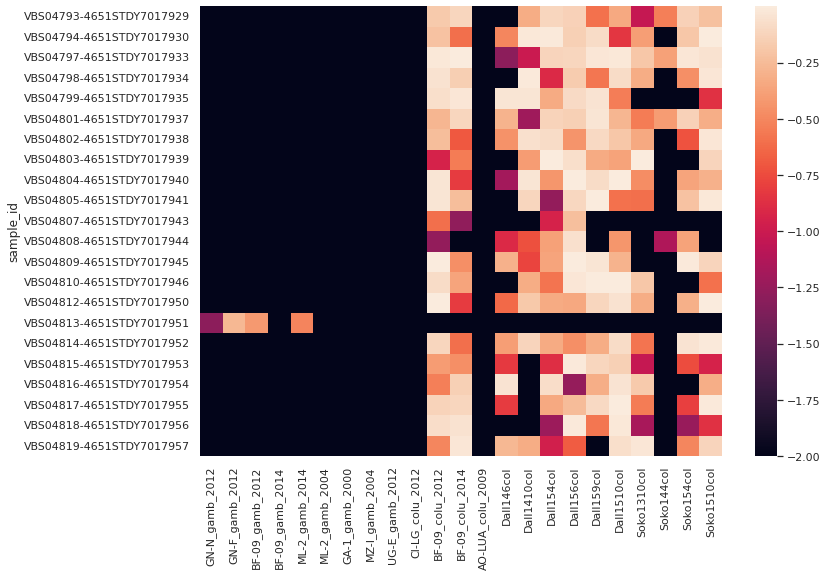

In [41]:
doubleton_sharing.plot_heatmap_identify(all_cohorts_big, 30, 'gamb_colu', queries3_1 = queries_big, inc4796 = False, incCMR=False)